<a href="https://colab.research.google.com/github/lukpras/book-recommendation/blob/main/book_recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommendation**
## **Content Based & Collaborative Filtering Recommendation**
### *https://www.dicoding.com/users/lukiprasetyo*
Last Submission Task for "Machine Learning Developer - Machine Learning Terapan"

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, HTML

## Load Dataset

In [2]:
!wget --no-check-certificate https://github.com/lukpras/datasets/raw/main/goodbooks-10k.zip

--2022-11-28 02:45:16--  https://github.com/lukpras/datasets/raw/main/goodbooks-10k.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/lukpras/datasets/main/goodbooks-10k.zip [following]
--2022-11-28 02:45:16--  https://media.githubusercontent.com/media/lukpras/datasets/main/goodbooks-10k.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12155229 (12M) [application/zip]
Saving to: ‘goodbooks-10k.zip’

goodbooks-10k.zip   100%[===================>]  11.59M  --.-KB/s    in 0.05s   

2022-11-28 02:45:17 (242 MB/s) - ‘goodbooks-10k.zip’ saved [12155229/12155229]



In [3]:
!unzip /content/goodbooks-10k.zip

Archive:  /content/goodbooks-10k.zip
  inflating: book_tags.csv           
  inflating: books.csv               
  inflating: ratings.csv             
  inflating: sample_book.xml         
  inflating: tags.csv                
  inflating: to_read.csv             


In [4]:
book = pd.read_csv(r'/content/books.csv')
ratings = pd.read_csv(r'/content/ratings.csv')
to_read = pd.read_csv(r'/content/to_read.csv')

## Exploring the Data

### Book Data

In [5]:
book.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [6]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [7]:
book.isnull().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

#### Cleaning book data

In [8]:
# Removing Duplicates
book.duplicated(
    subset =['original_title'],
    keep = False
).sum()

849

```
Therefore, 849 duplicates were present in the book dataset, that need to be removed.
```

In [9]:
#Dropping null title
book.drop_duplicates(
    subset='original_title',
    keep=False,inplace=True
)
print(book.shape)

(9151, 23)


### Ratings

In [10]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [12]:
ratings.isnull().sum()

book_id    0
user_id    0
rating     0
dtype: int64

#### Cleaning ratings data

In [13]:
ratings=ratings.sort_values("user_id")
ratings.shape

(981756, 3)

In [14]:
# Find duplicates data
ratings.duplicated(
    subset =["user_id","book_id"],
    keep = False
).sum()

4487

```
Therefore, 4487 duplicates were present in the ratings dataset, that need to be removed.
```

In [15]:
# Removing duplicates data
ratings.drop_duplicates(
    subset =["user_id","book_id"],
    keep = False, inplace = True
) 
ratings.shape

(977269, 3)

## Data Visualization

     function below essentially convert the image url to 
     '<img src="'+ path + '"/>' format. And one can put any
     formatting adjustments to control the height, aspect ratio, size etc.
     within as in the below example. 


In [16]:
def path_to_image_html(path):
    return '<img src="'+ path + '""/>'

### Top 10 Rated Books

In [17]:
# Top 10 Rated Books
top_rated = book.sort_values('average_rating', ascending=False)
top10 = top_rated.head(10)
f = ['title','small_image_url']
displ=(top10[f])
displ.set_index('title', inplace=True)
HTML(
    displ.to_html(
        escape=False,
        formatters=dict(small_image_url=path_to_image_html),
        justify='center'
    )
)

,small_image_url
title,
The Complete Calvin and Hobbes,
"Words of Radiance (The Stormlight Archive, #2)",
Mark of the Lion Trilogy,
It's a Magical World: A Calvin and Hobbes Collection,
There's Treasure Everywhere: A Calvin and Hobbes Collection,
"Harry Potter Boxset (Harry Potter, #1-7)",
"Harry Potter Collection (Harry Potter, #1-6)",
The Indispensable Calvin and Hobbes,
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury,


### Top 10 Most Popular Book

In [18]:
# Top 10 Most Popular Book
pop10=book.sort_values(by='ratings_count', ascending=False)
f=['title','small_image_url']
pop10=pop10.head(10)

pop10=(pop10[f])
pop10=pop10.set_index('title')

HTML(
    pop10.to_html(
        escape=False,
        formatters=dict(small_image_url=path_to_image_html),
        justify='center'
    )
)

,small_image_url
title,
"The Hunger Games (The Hunger Games, #1)",
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
To Kill a Mockingbird,
The Great Gatsby,
The Fault in Our Stars,
The Hobbit,
The Catcher in the Rye,
Pride and Prejudice,
"Angels & Demons (Robert Langdon, #1)",


### Most Common Rating Values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


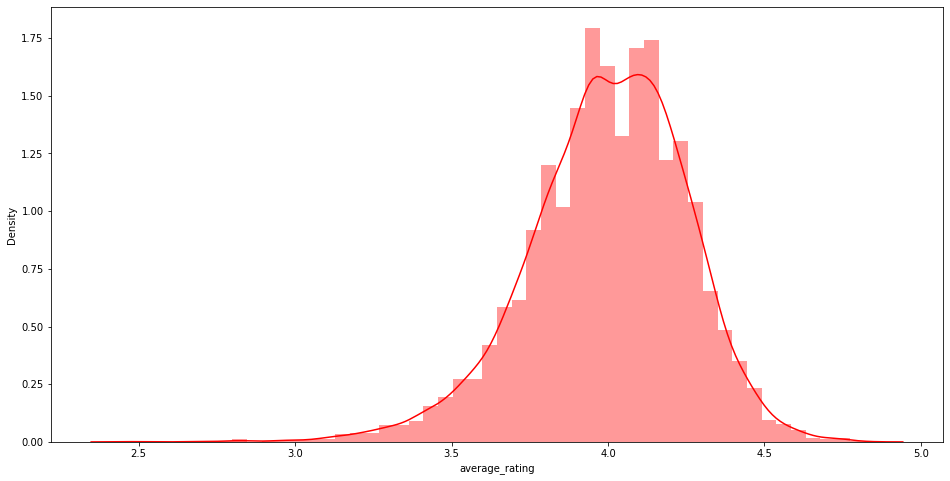

In [19]:
plt.figure(figsize=(16,8))
sns.distplot(a=book['average_rating'], kde=True, color='r')

```
Therefore, most common rating is somewhere between 3.5 to 4.
```

### Highly Rated Authors

In [20]:
f=['authors', 'average_rating']
top_authors=top_rated[f]
top_authors=top_authors.head(20)

In [21]:
fig = px.bar(top_authors, x='authors', y='average_rating', color ='average_rating')
fig.show()

```
Above barplot shows the top rated authors. Bill Waterson is on the top with a rating of 4.82!
```

### Book that user want to read

In [22]:
to_read = book.merge(
    to_read,
    left_on='book_id',
    right_on='book_id',
    how='inner'
)

In [23]:
to_read = to_read.groupby('original_title').count()

In [24]:
to_read = to_read.sort_values(by='id', ascending=False)
to_read20 = to_read.head(20)

In [25]:
fig = px.bar(to_read20, x=to_read20.index, y='id', color ='id')
fig.show()

# Recommendation System

## Content Based

### Data Preparation and Feature Engineering

#### Cleaning the data

In [26]:
fillnabooks= book.fillna('')

In [27]:
# Making the data to lower case and removing whitespace
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [28]:
# extracting feature
features=['original_title','authors','average_rating']
fillednabooks = fillnabooks[features]
fillednabooks = fillednabooks.astype(str)
fillednabooks.dtypes

original_title    object
authors           object
average_rating    object
dtype: object

In [29]:
for feature in features:
    fillednabooks[feature] = fillednabooks[feature].apply(clean_data)
    
fillednabooks.head(5)

,original_title,authors,average_rating
0,thehungergames,suzannecollins,4.34
1,harrypotterandthephilosopher'sstone,"j.k.rowling,marygrandpré",4.44
3,tokillamockingbird,harperlee,4.25
4,thegreatgatsby,f.scottfitzgerald,3.89
5,thefaultinourstars,johngreen,4.26


In [30]:
# Creating bag of words for all rows
def create_soup(x):
    return x['original_title']+ ' ' + x['authors'] + ' ' + x['average_rating']
fillednabooks['soup'] = fillednabooks.apply(create_soup, axis=1)

In [31]:
fillednabooks.head()

,original_title,authors,average_rating,soup
0,thehungergames,suzannecollins,4.34,thehungergames suzannecollins 4.34
1,harrypotterandthephilosopher'sstone,"j.k.rowling,marygrandpré",4.44,harrypotterandthephilosopher'sstone j.k.rowlin...
3,tokillamockingbird,harperlee,4.25,tokillamockingbird harperlee 4.25
4,thegreatgatsby,f.scottfitzgerald,3.89,thegreatgatsby f.scottfitzgerald 3.89
5,thefaultinourstars,johngreen,4.26,thefaultinourstars johngreen 4.26


#### Transforming text to Vector

In [32]:
tfid = TfidfVectorizer()
tfid.fit(fillednabooks['soup'])
tfid.get_feature_names_out()

array(['000', '000placestoseebeforeyoudie', '000recipes', ..., '신경숙',
       '엄마를부탁해', '채식주의자'], dtype=object)

In [33]:
tfidf_matrix = tfid.fit_transform(fillednabooks['soup'])
tfidf_matrix.shape

(9151, 17356)

In [34]:
tfidf_matrix

<9151x17356 sparse matrix of type '<class 'numpy.float64'>'
	with 33931 stored elements in Compressed Sparse Row format>

In [35]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfid.get_feature_names(),
    index=fillednabooks.soup
).sample(22, axis=1).sample(10, axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,ビート,michaelnorth,russellmunson,milestogo,ramonaandhermother,therailwaychildren,betweensisters,thesheep,homicide,endofwatch,...,thebattleforskandia,alanlee,lovewarrior,jaycrownover,waystation,darkestpowerstrilogy,thesavinggraces,speaker,icecold,frederikpohl
soup,,,,,,,,,,,,,,,,,,,,,
"fearandloathinginlasvegas:asavagejourneytotheheartoftheamericandream hunters.thompson,ralphsteadman 4.08",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"preachervol.2:untiltheendoftheworld garthennis,stevedillon 4.28",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a.lincoln:abiography ronaldc.whitejr. 4.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
thelegendofhuma(dragonlance:heroes#1) richarda.knaak 4.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lesecretdelalicorne hergé 4.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ghostworld danielclowes 3.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cujo stephenking 3.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"welcometolovecraft joehill,gabrielrodríguez 4.18",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"thethirdday,thefrost johnmarsden 4.19",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [38]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=fillednabooks['original_title'], columns=fillednabooks['original_title'])
print('Shape:', cosine_sim_df.shape)
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9151, 9151)


original_title,thecementgarden,ash,brokensilence,demian:diegeschichteeinerjugend,thepost-americanworld2.0
original_title,,,,,
lovingwhatis:fourquestionsthatcanchangeyourlife,0.0,0.000000,0.0,0.0,0.0
yousuck,0.0,0.000000,0.0,0.0,0.0
huntersofdune,0.0,0.160677,0.0,0.0,0.0
friedgreentomatoesatthewhistlestopcafe,0.0,0.000000,0.0,0.0,0.0
thebeatlesanthology,0.0,0.000000,0.0,0.0,0.0
whatwekeep,0.0,0.000000,0.0,0.0,0.0
pyramids,0.0,0.000000,0.0,0.0,0.0
nick&norah'sinfiniteplaylist,0.0,0.000000,0.0,0.0,0.0
westwiththenight,0.0,0.000000,0.0,0.0,0.0


### Get Recommendation

In [39]:
fillednabooks=fillednabooks.reset_index()
indices = pd.Series(fillednabooks.index, index=fillednabooks['original_title'])

In [40]:
def get_recommendations(title, cosine_sim=cosine_sim, k=11):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all books with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:k]

    # Get the movie indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return list(book['original_title'].iloc[book_indices])

#### Testing the Top 10 Recommendation

In [108]:
book_title1 = "The Hobbit"

content_recommend_list1 = get_recommendations(book_title1, cosine_sim)
content_recommend1 = pd.DataFrame(content_recommend_list1)
content_recommend1.columns = ["Books Recommendation based on " + book_title1]
content_recommend1.index = np.arange(1,len(content_recommend1)+1)
content_recommend1

,Books Recommendation based on The Hobbit
1,The Hobbit or There and Back Again
2,The Lord of the Rings
3,The Fellowship of the Ring
4,The Two Towers
5,The Hobbit and The Lord of the Rings
6,The Return of the King
7,The Tommyknockers
8,The Tenth Circle
9,Next
10,The Children of Húrin


In [107]:
book_title2 = "Jurassic Park"

content_recommend_list2 = get_recommendations(book_title2, cosine_sim)
content_recommend2 = pd.DataFrame(content_recommend_list2)
content_recommend2.columns = ["Books Recommendation based on " + book_title2]
content_recommend2.index = np.arange(1,len(content_recommend2)+1)
content_recommend2

,Books Recommendation based on Jurassic Park
1,The Lost World
2,The Andromeda Strain
3,Timeline
4,The Great Train Robbery
5,Sphere
6,The Terminal Man
7,Disclosure
8,Prey
9,State of Fear
10,Airframe


### Evaluation

In [109]:
# Evaluation for Recommendation 1 "The Hobbit"
content_eval1 = content_recommend1
content_eval1.columns = ["original_title"]
content_eval1 = pd.merge(
    content_eval1,
    book,
    left_on='original_title',
    right_on='original_title',
    how='inner')
content_eval1[['original_title', 'authors', 'average_rating']]

,original_title,authors,average_rating
0,The Hobbit or There and Back Again,J.R.R. Tolkien,4.25
1,The Lord of the Rings,J.R.R. Tolkien,4.47
2,The Fellowship of the Ring,J.R.R. Tolkien,4.34
3,The Two Towers,J.R.R. Tolkien,4.42
4,The Hobbit and The Lord of the Rings,J.R.R. Tolkien,4.59
5,The Return of the King,J.R.R. Tolkien,4.51
6,The Tommyknockers,Stephen King,3.48
7,The Tenth Circle,Jodi Picoult,3.48
8,Next,Michael Crichton,3.48
9,The Children of Húrin,"J.R.R. Tolkien, Christopher Tolkien, Alan Lee",3.94


In [110]:
book_for_eval1 = book[book.original_title.eq(book_title1)]
book_for_eval1[['original_title', 'authors', 'average_rating']]

,original_title,authors,average_rating
465,The Hobbit,"Chuck Dixon, J.R.R. Tolkien, David Wenzel, Sea...",4.48


```
The Hobbit have 5 authors so is hard to calculate precision, but we will take the main authors. the main authors is J.R.R Tolkien
```
```
So the precission is
Recommender system precision = recommendation that relevant / items we recommendend
```
```
Recommender system precision = 7 / 10
Recommender system precision = 70%
```

In [113]:
# Evaluation for Recommendation 2 "Jurassic Park"
content_eval2 = content_recommend2
content_eval2.columns = ["original_title"]
content_eval2 = pd.merge(
    content_eval2,
    book,
    left_on='original_title',
    right_on='original_title',
    how='inner')
content_eval2[['original_title', 'authors', 'average_rating']]

,original_title,authors,average_rating
0,The Lost World,Michael Crichton,3.72
1,The Andromeda Strain,Michael Crichton,3.87
2,Timeline,Michael Crichton,3.83
3,The Great Train Robbery,Michael Crichton,3.84
4,Sphere,Michael Crichton,3.77
5,The Terminal Man,Michael Crichton,3.34
6,Disclosure,Michael Crichton,3.76
7,Prey,Michael Crichton,3.72
8,State of Fear,Michael Crichton,3.69
9,Airframe,Michael Crichton,3.66


In [114]:
book_for_eval2 = book[book.original_title.eq(book_title2)]
book_for_eval2[['original_title', 'authors', 'average_rating']]

,original_title,authors,average_rating
83,Jurassic Park,Michael Crichton,3.96


```
Jurassic Park have only one author so to calculate precison based on autors is good the best
```
```
So the precision is very good
Recommender system precision = 10 / 10
Recommender system precision = 100%
```

## Collaborative Filtering

### Data Preparation and Feature Engineering

#### Cleaning the data

In [67]:
# Drop null values
new_book = book[['book_id', 'original_title']].dropna()
new_book

,book_id,original_title
0,2767052,The Hunger Games
1,3,Harry Potter and the Philosopher's Stone
3,2657,To Kill a Mockingbird
4,4671,The Great Gatsby
5,11870085,The Fault in Our Stars
...,...,...
9995,7130616,Bayou Moon
9996,208324,Means of Ascent
9997,77431,The Mauritius Command
9998,8565083,Cinderella Ate My Daughter: Dispatches from th...


In [68]:
# Count book rating based on user
ratings=ratings.dropna()
df_ratings_cnt_tmp = pd.DataFrame(ratings.groupby('rating').size(), columns=['count'])
df_ratings_cnt_tmp.head(10)

,count
rating,
1,19485
2,63010
3,247698
4,355878
5,291198


In [69]:
# Find books that not rated or rated 0
num_users = len(ratings.user_id.unique())
num_items = len(ratings.book_id.unique())
total_cnt = num_users * num_items
rating_zero_cnt = total_cnt - ratings.shape[0]

df_ratings_cnt = df_ratings_cnt_tmp.append(
    pd.DataFrame({'count': rating_zero_cnt}, index=[0.0]),
    verify_integrity=True,
).sort_index()
df_ratings_cnt

,count
0.0,532822731
1.0,19485
2.0,63010
3.0,247698
4.0,355878
5.0,291198


In [70]:
df_ratings_cnt['log_count'] = np.log(df_ratings_cnt['count'])
df_ratings_cnt

,count,log_count
0.0,532822731,20.093699
1.0,19485,9.877400
2.0,63010,11.051049
3.0,247698,12.419966
4.0,355878,12.782343
5.0,291198,12.581759


Text(0, 0.5, 'number of ratings')

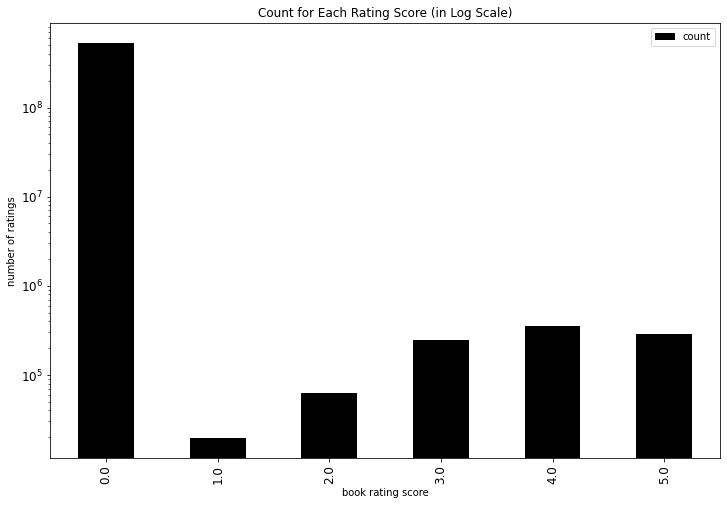

In [71]:
# Make visualization for counting rating in book
get_ipython().run_line_magic('matplotlib', 'inline')
ax = df_ratings_cnt[['count']].reset_index().rename(columns={'index': 'rating score'}).plot(
    x='rating score',
    y='count',
    kind='bar',
    figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12,color='black'
)
ax.set_xlabel("book rating score")
ax.set_ylabel("number of ratings")

In [72]:
# calculate number of ratings on each book
df_books_cnt = pd.DataFrame(ratings.groupby('book_id').size(), columns=['count'])
df_books_cnt.head()

,count
book_id,
1,100
2,100
3,100
4,100
5,100


In [73]:
# now we need to take only books that have been rated atleast 50 times
# to get some idea of the reactions of users towards it.
popularity_t = 50
popular_books = list(set(df_books_cnt.query('count >= @popularity_t').index))
df_ratings_drop = ratings[ratings.book_id.isin(popular_books)]
print('shape of original ratings data: ', ratings.shape)
print('shape of ratings data after dropping unpopular book: ', df_ratings_drop.shape)

shape of original ratings data:  (977269, 3)
shape of ratings data after dropping unpopular book:  (976884, 3)


In [74]:
# get number of ratings given by every user
df_users_cnt = pd.DataFrame(df_ratings_drop.groupby('user_id').size(), columns=['count'])
df_users_cnt.head()

,count
user_id,
1,3
2,3
3,2
4,3
5,5


In [75]:
# Dropping users who have rated less than 50 times
ratings_t = 50
active_users = list(set(df_users_cnt.query('count >= @ratings_t').index))
df_ratings_drop_users = df_ratings_drop[df_ratings_drop.user_id.isin(active_users)]
print('shape of original ratings data: ', ratings.shape)
print('shape of ratings data after dropping both unpopular book and inactive users: ', df_ratings_drop_users.shape)

shape of original ratings data:  (977269, 3)
shape of ratings data after dropping both unpopular book and inactive users:  (417889, 3)


In [76]:
# Create new df after dropping unpopular book and inactive users
new_df = pd.merge(
    df_ratings_drop_users,
    new_book,
    left_on='book_id',
    right_on='book_id',
    how='inner')
new_df

,book_id,user_id,rating,original_title
0,3711,7,5,White Teeth
1,3711,341,3,White Teeth
2,3711,2553,3,White Teeth
3,3711,2559,5,White Teeth
4,3711,2776,4,White Teeth
...,...,...,...,...
32555,9598,45664,4,Deadeye Dick
32556,9598,50638,5,Deadeye Dick
32557,9531,47742,5,Peter and the Shadow Thieves
32558,9531,51606,5,Peter and the Shadow Thieves


In [77]:
# Change user id to list without the same values
user_ids = new_df['user_id'].unique().tolist()
print('list user_id: ', user_ids)
 
# Encoded the user id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user id : ', user_to_user_encoded)
 
# Encoded numbers to user id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded numbers to user id: ', user_encoded_to_user)

list user_id:  [7, 341, 2553, 2559, 2776, 2906, 3779, 4096, 6042, 6226, 6420, 6601, 7443, 8621, 9046, 9234, 11328, 11625, 11843, 11876, 12173, 13307, 15166, 16569, 16883, 16913, 18053, 18228, 18316, 18342, 18908, 19083, 21451, 21784, 22905, 25098, 25229, 26096, 27330, 28438, 28495, 29307, 29541, 29695, 29722, 31276, 32058, 34703, 35599, 36135, 36752, 38654, 39979, 40841, 41318, 41346, 45071, 45880, 48558, 48800, 49752, 50094, 51402, 51483, 52748, 53204, 2487, 2606, 3350, 4816, 5969, 6190, 7801, 8779, 8861, 9479, 9599, 10190, 10534, 10662, 10900, 11261, 13575, 13902, 14185, 14940, 15011, 16587, 16965, 18045, 18361, 18494, 18566, 20573, 20944, 21110, 21149, 21581, 21599, 21713, 23202, 23558, 24204, 24848, 25322, 26870, 28444, 29607, 31010, 32034, 32669, 32764, 36682, 39239, 39248, 45107, 48317, 244, 319, 430, 951, 1136, 1762, 1983, 2552, 2910, 3022, 3721, 3796, 4133, 4236, 4358, 4399, 4427, 4470, 6016, 7493, 8060, 8209, 8831, 9135, 10110, 10111, 10181, 10277, 10457, 11287, 12148, 12417, 

In [78]:
# Change book id to list without the same values
book_ids = new_df['book_id'].unique().tolist()
 
# Encoded the book id
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
 
# Encoded numbers to book id
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

In [79]:
# Mapping user to dataframe based on user_id
new_df['user'] = new_df['user_id'].map(user_to_user_encoded)
 
# Mapping book to dataframe based on book_id
new_df['book'] = new_df['book_id'].map(book_to_book_encoded)

In [80]:
new_df

,book_id,user_id,rating,original_title,user,book
0,3711,7,5,White Teeth,0,0
1,3711,341,3,White Teeth,1,0
2,3711,2553,3,White Teeth,2,0
3,3711,2559,5,White Teeth,3,0
4,3711,2776,4,White Teeth,4,0
...,...,...,...,...,...,...
32555,9598,45664,4,Deadeye Dick,686,772
32556,9598,50638,5,Deadeye Dick,4283,772
32557,9531,47742,5,Peter and the Shadow Thieves,4721,773
32558,9531,51606,5,Peter and the Shadow Thieves,3488,773


In [81]:
# Find total user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Find total book
num_book = len(book_encoded_to_book)
print(num_book)
 
# Change rating to float
# new_df['rating'] = new_df['rating'].values.astype(np.float32)
 
# Find the minimum value in the rating
min_rating = min(new_df['rating'])
 
# Find the maximum value in the rating
max_rating = max(new_df['rating'])
 
print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

4874
775
Number of User: 4874, Number of Book: 775, Min Rating: 1, Max Rating: 5


In [82]:
# Randomize the dataset
new_df = new_df.sample(frac=1, random_state=42)
new_df

,book_id,user_id,rating,original_title,user,book
14160,2095,7610,5,The Universe in a Nutshell,220,227
27047,2879,23482,3,Bleach―ブリーチ― 15,1852,520
28867,8647,6698,3,Shadow of the Giant,1179,575
5667,343,28824,3,Das Parfum. Die Geschichte eines Mörders,558,89
7827,900,32810,4,The Game,3162,118
...,...,...,...,...,...,...
29802,676,37675,3,Sailing Alone Around the Room: New and Selecte...,4462,602
5390,870,12623,5,鋼の錬金術師 1,913,84
860,291,41145,5,الأجنحة المتكسرة,646,10
15795,119,17228,4,The Lord of the Rings: The Art of The Fellowsh...,153,263


#### Splitting data to train and validation sets

In [83]:
# Create variable to match book and user
x = new_df[['user', 'book']].values
 
# Create variable to make rating of the results 
y = new_df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Splitting dataset to 80% train and 20% validation
train_indices = int(0.8 * new_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 220  227]
 [1852  520]
 [1179  575]
 ...
 [ 646   10]
 [ 153  263]
 [4576  433]] [1.   0.5  0.5  ... 1.   0.75 1.  ]


### Creating Model

In [84]:
class RecommenderNet(tf.keras.Model):
 
  # Initialization
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # call layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # call layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # call layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # call layer embedding 4
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

### Compiling model

In [85]:
# Model Initializaation
model = RecommenderNet(num_users, num_book, 50)
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

#### Training model

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
3327/3327 [==============================] - 15s 5ms/step - loss: 0.6078 - root_mean_squared_error: 0.2552 - val_loss: 0.5959 - val_root_mean_squared_error: 0.2458
Epoch 2/100
3327/3327 [==============================] - 20s 6ms/step - loss: 0.5825 - root_mean_squared_error: 0.2326 - val_loss: 0.5994 - val_root_mean_squared_error: 0.2490
Epoch 3/100
3327/3327 [==============================] - 21s 6ms/step - loss: 0.5736 - root_mean_squared_error: 0.2243 - val_loss: 0.5921 - val_root_mean_squared_error: 0.2425
Epoch 4/100
3327/3327 [==============================] - 15s 5ms/step - loss: 0.5661 - root_mean_squared_error: 0.2177 - val_loss: 0.5889 - val_root_mean_squared_error: 0.2399
Epoch 5/100
3327/3327 [==============================] - 15s 5ms/step - loss: 0.5603 - root_mean_squared_error: 0.2122 - val_loss: 0.5867 - val_root_mean_squared_error: 0.2381
Epoch 6/100
3327/3327 [==============================] - 15s 5ms/step - loss: 0.5563 - root_mean_squared_error: 0.2086 -

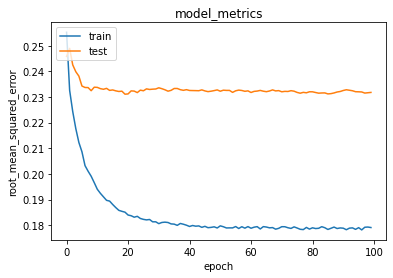

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Testing the Top 10 Recommendation

#### Recommendation for User

In [ ]:
book_df = new_book
 
# Mengambil sample user
user_id = new_df.user_id.sample(1).iloc[0]
book_readed_by_user = new_df[new_df.user_id == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
book_not_readed = book_df[~book_df['book_id'].isin(book_readed_by_user.book_id.values)]['book_id'] 
book_not_readed = list(
    set(book_not_readed)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_not_readed = [[book_to_book_encoded.get(x)] for x in book_not_readed]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_readed), book_not_readed)
)

In [ ]:
ratings_predict_1 = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings_predict_1.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_readed[x][0]) for x in top_ratings_indices
]
 
print('\nShowing recommendations for users: {}\n'.format(user_id))
print('====' * 8)
print('Book with high ratings from user')
print('----' * 8)
 
top_book_user = (
    book_readed_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .book_id.values
)
 
book_df_rows = book_df[book_df['book_id'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.original_title)
print()
print('====' * 8)
print('Top 10 book recommendation')
print('----' * 8)
 
recommended_book = book_df[book_df['book_id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.original_title)

25/25 [==============================] - 0s 2ms/step

Showing recommendations for users: 32592

Book with high ratings from user
--------------------------------
Harry Potter and the Philosopher's Stone
The Hitchhiker's Guide to the Galaxy
Heidi
The Lost Continent: Travels in Small-Town America
Zodiac

Top 10 book recommendation
--------------------------------
Fahrenheit 451
American Gods
Still Life with Woodpecker
Next
Rachel's Holiday
Little Town on the Prairie
Lucy Sullivan is Getting Married
Bokhandleren i Kabul
Four Blondes
Motor Mouth


#### Recommendation for Book that you choose

In [ ]:
what_book = "Peter and the Shadow Thieves"
book_readed = new_df[new_df.original_title.eq(what_book)]

book_not_readed = book_df[~book_df['book_id'].isin(book_readed.book_id.values)]['book_id'] 
book_not_readed = list(
    set(book_not_readed)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_not_readed = [[book_to_book_encoded.get(x)] for x in book_not_readed]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_readed), book_not_readed)
)

In [ ]:
ratings_predict_2 = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings_predict_2.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_readed[x][0]) for x in top_ratings_indices
]
 
print('\mThe Book you read\n')
print('----' * 8)

print(what_book) 
 
book_df_rows = book_df[book_df['book_id'].isin(book_readed)]
for row in book_df_rows.itertuples():
    print(row.original_title)

print()
print('====' * 8)
print('Top 10 book recommendation')
print('----' * 8)
 
recommended_book = book_df[book_df['book_id'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.original_title)

25/25 [==============================] - 0s 2ms/step
\mThe Book you read

--------------------------------
Peter and the Shadow Thieves

Top 10 book recommendation
--------------------------------
Atonement
A People's History of the United States: 1492 to Present 
Still Life with Woodpecker
Next
Rachel's Holiday
Lucy Sullivan is Getting Married
Bokhandleren i Kabul
Amsterdam
The Taste of Home Cookbook
The Android's Dream
